In [4]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_CV_MC/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [5]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [6]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Detector systematic: CV

In [7]:
# Load input files
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_detsys_CV.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.root'

tree_name = 'numuCCAna'

In [8]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0  #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	88718
Data: Number of Entries:	0
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.09993583549e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.09993583549e+20  Scale:  0.0786318594316
Scalefactors: 
Data:		1.0
Ext:		0.116876357973
Overlay:	0.0786318594316
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_data_V22.root does not exist


In [9]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out4.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	0
Overlay: Number of Entries:	0
Data: Number of Entries:	0
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.rootout4.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.rootout4.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_data_V22.rootout4.root does not exist


In [10]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [11]:
'''fidVol = '((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)))'
MCfidVol = '((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)))'
numu_signal = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)' # numu CC signal definition
numu_true = '('+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14)' # numu CC signal definition
numu_nomu = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5)' # not an MC muon
numu_lowpur = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5)' #low purity
numu_nc = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==1)' # nutral current
numu_ov = '('+fidVol+' && !'+MCfidVol+')' # out of fiducial
numu_other = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG!=14)' # e.g anti nu or nue

track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && ('+track_end_uncontained+'==1 || nr_crthit_beam_tres==0) && (abs(crtt0_time-4)<0.8 || crtt0_time==-1)'

cut = fidVol+' && (key_muon==track_key) && '+crt_tom_cut+' && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

print cut

overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}'''

"fidVol = '((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)))'\nMCfidVol = '((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)))'\nnumu_signal = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)' # numu CC signal definition\nnumu_true = '('+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14)' # numu CC signal definition\nnumu_nomu = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5)' # not an MC muon\nnumu_lowpur = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5)' #low purity\nnumu_nc = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==1)' # nutral current\nnumu_ov = '('+fidVol+' && !'+MCfidVol+')' # out of fiducial\nnumu_other = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG

In [12]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_data_V22.root does not exist
Error in <TTreeFormula::Compile>:  Bad numerical expression : "fidVol"


In [13]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [11]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


weight_name = 'EventWeight*TunedCentralValue_Genie'


In [12]:
# Load the global variables for access of functions
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

In [13]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [14]:
print numu_signal

fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5


In [15]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
#print dirt_out.GetEntries(cut)
#print dirt_out.GetEntries(cut)*scale_out[dirt_out]

#print overlay_out.GetEntries("!((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)) && (MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)")
print overlay_out.GetEntries('!(numu_signal)')

cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'


73823


In [16]:
# calculate total flux integrated cross section:
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)

N_data = data_out.GetEntries(cut)
N_dataMC = overlay_out.GetEntries(cut)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut,'0') # weights for signal definition
N_dataMC = N_dataMC*h_weight_func.GetMean()

N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+' && numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries(numu_true)*scale_out[overlay_out]
#print N_dirt, N_overlay
N_overlay_detsys = detsys_out.GetEntries(cut+'&& !numu_signal')*scale_out[detsys_out]
N_signal_detsys = detsys_out.GetEntries(cut+'&& numu_signal')*scale_out[detsys_out]
N_true_detsys = detsys_out.GetEntries('numu_true')*scale_out[detsys_out]

dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]

h_weight_func2 = ROOT.TH1F("h_weight_func2",'h_weight_func',10000,0,1000)
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && numu_signal','0') # weights for signal definition
detsys_signal = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && !numu_signal','0') # weights for signal definition
detsys_pass_weight = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2','numu_true','0') # weights for signal definition
detsys_true_weight = h_weight_func2.GetMean()

print 'Weights for CV', overlay_signal, overlay_pass_weight, overlay_true_weight
print 'Weights for detsys', detsys_signal, detsys_pass_weight, detsys_true_weight

N_dirt = N_dirt*dirt_pass_weight

N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight

N_overlay_detsys = N_overlay_detsys*detsys_pass_weight
N_signal_detsys = N_signal_detsys*detsys_signal
N_true_detsys = N_true_detsys*detsys_true_weight

eff = N_signal/(N_true+1e-80)
eff_detsys = N_signal_detsys/(N_true_detsys+1e-80)

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of data MC:', N_dataMC
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Total integrated cross section:', sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC

sigma_tot_detsys = (N_dataMC- (N_ext+N_dirt+N_overlay_detsys))/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay_detsys
print 'Number of overlay signal:', N_signal_detsys
print 'Total integrated cross section:', sigma_tot_detsys
sigma_tot_MC_detsys = (N_signal_detsys)/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC_detsys

Weights for CV 1.17368250188 1.09902429084 1.209350713
Weights for detsys 1.17368250188 1.09902429084 1.209350713
Number of data: 1470
Number of ext: 161.40625036
Number of dirt: 36.0061699854
Number of overlay: 221.662999903
Number of overlay signal: 1053.93852431
Total integrated cross section: 8.07690434789e-39
Total integrated cross section for MC: 8.10006808612e-39
Number of data: 1470
Number of ext: 161.40625036
Number of dirt: 36.0061699854
Number of overlay: 221.662999903
Number of overlay signal: 1053.93852431
Total integrated cross section: 8.07690434789e-39
Total integrated cross section for MC: 8.10006808612e-39


In [17]:
print eff,N_signal,(N_true+0.000001)
print eff,N_signal/scale_out[overlay_out],(N_true+0.000001)/scale_out[overlay_out]
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'Scaling: ', scale_out[detsys_out],scale_out[overlay_out],scale_out[dirt_out],scale_out[ext_out],scale_out[data_out]

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


0.499467422129 1053.93852431 2110.12466101
0.499467422129 13403.4541714 26835.4923343
0.499467422129 1053.93852431 2110.12466101
Scaling:  0.0786318594316 0.0786318594316 0.0691811002835 0.116876357973 1.0
xsec percent diff MC:  0.0
xsec percent diff:  0.0


In [18]:
#NuCC.printEff_out(cut)

In [19]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

780

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_eff_trueMom.root has been created


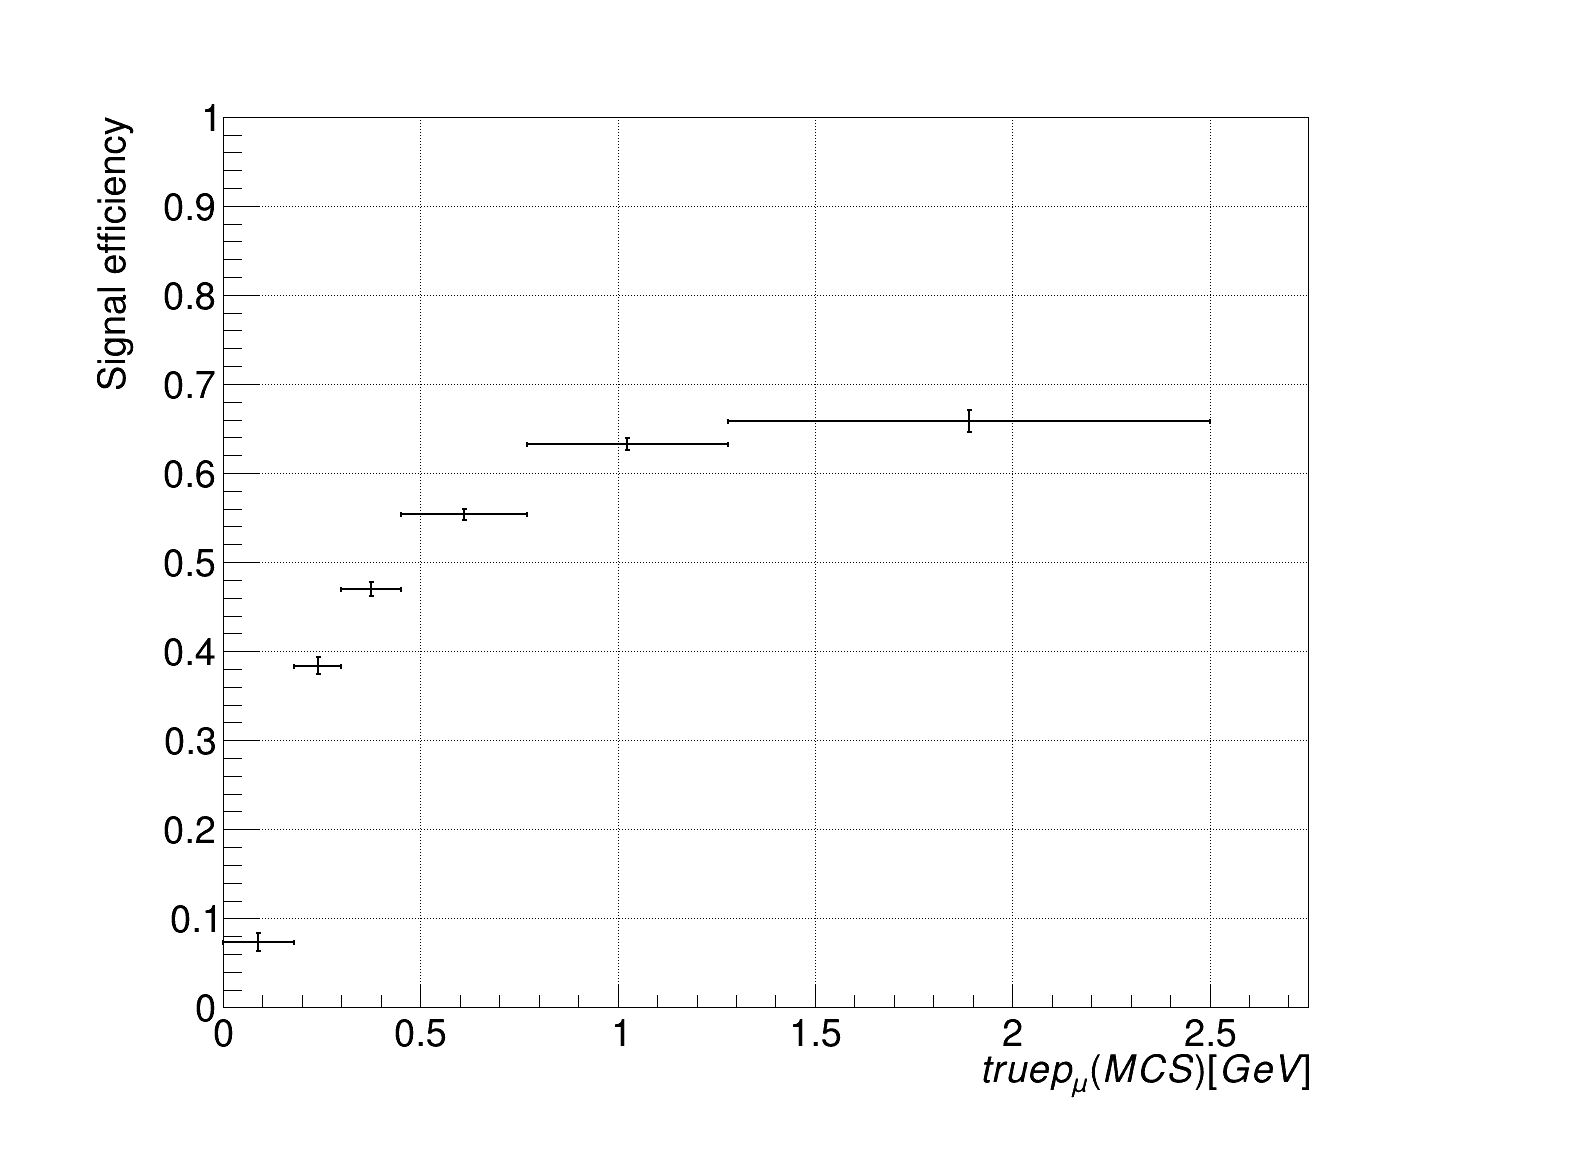

In [20]:

weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("true p_{\mu} (MCS) [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(outputdir_root + "h_eff_trueMom.root")

eff.Write("h_eff_true")

60487

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h2_true_MCS.png has been created


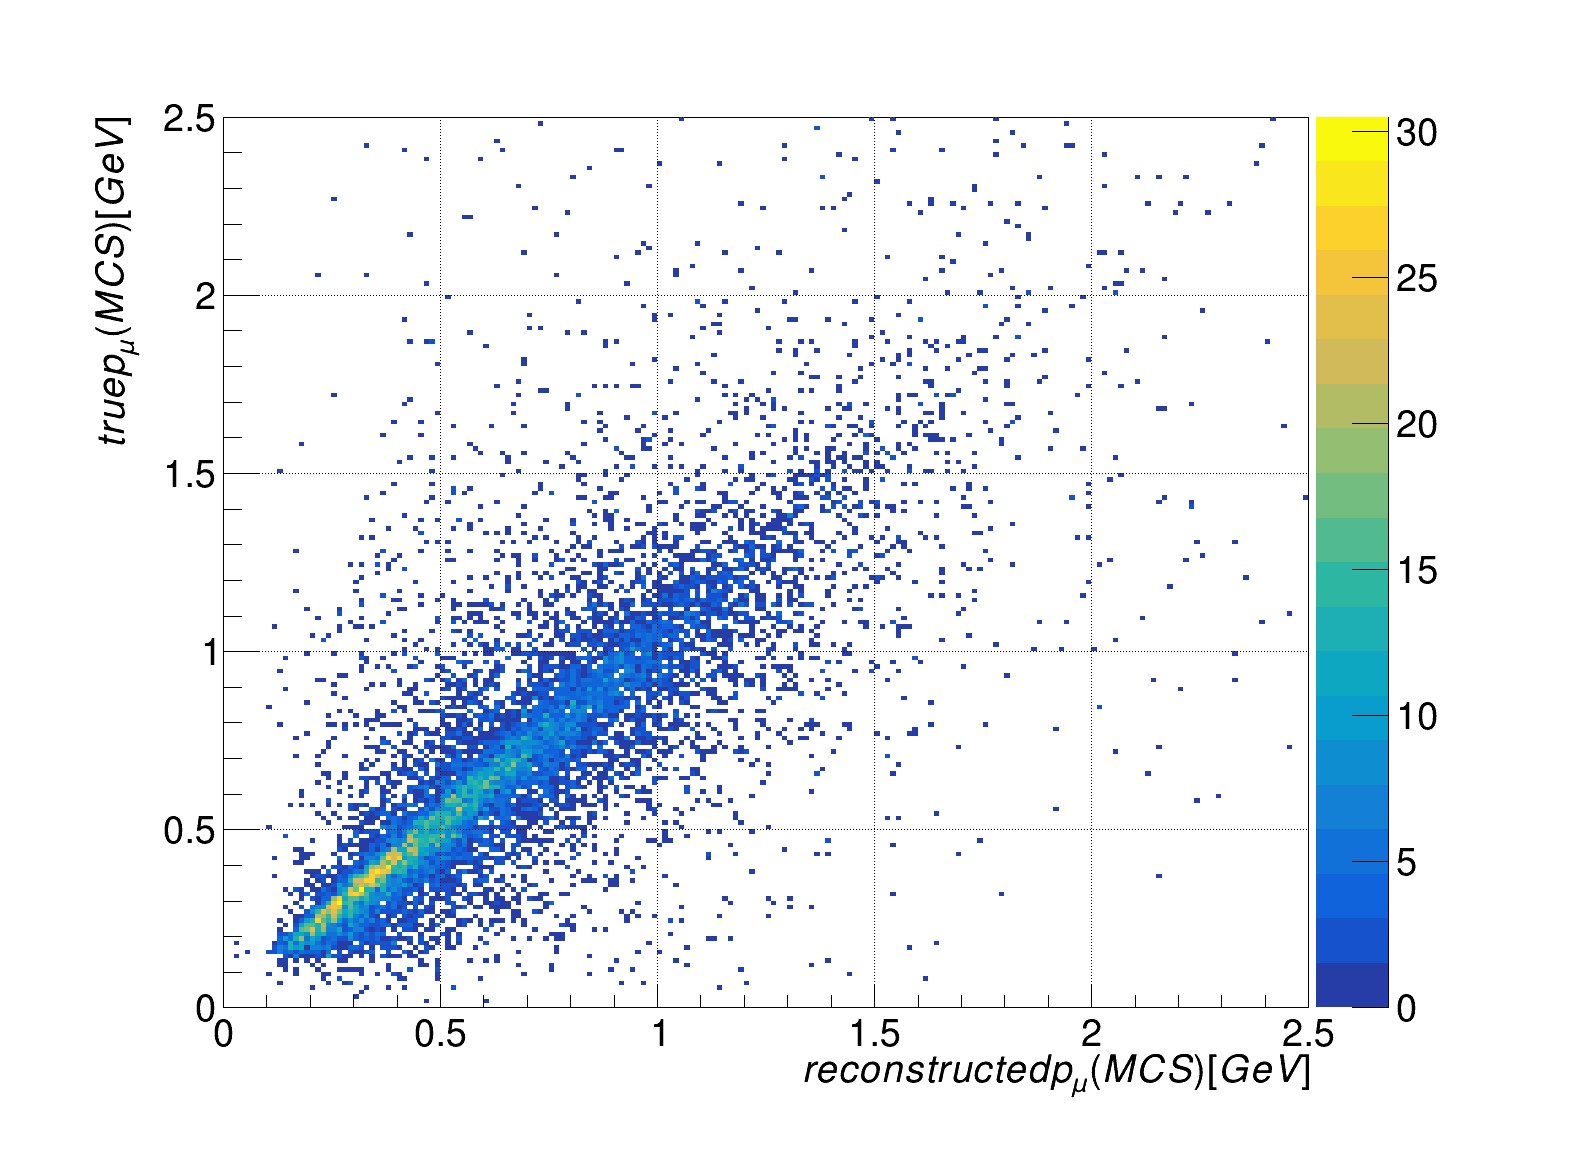

In [21]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS.root")
c1.SaveAs(outputdir_png + "h2_true_MCS.png")
h_migration.Write("h2_true_MCS_fine")

1148

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h2_true_MCS_bin.png has been created


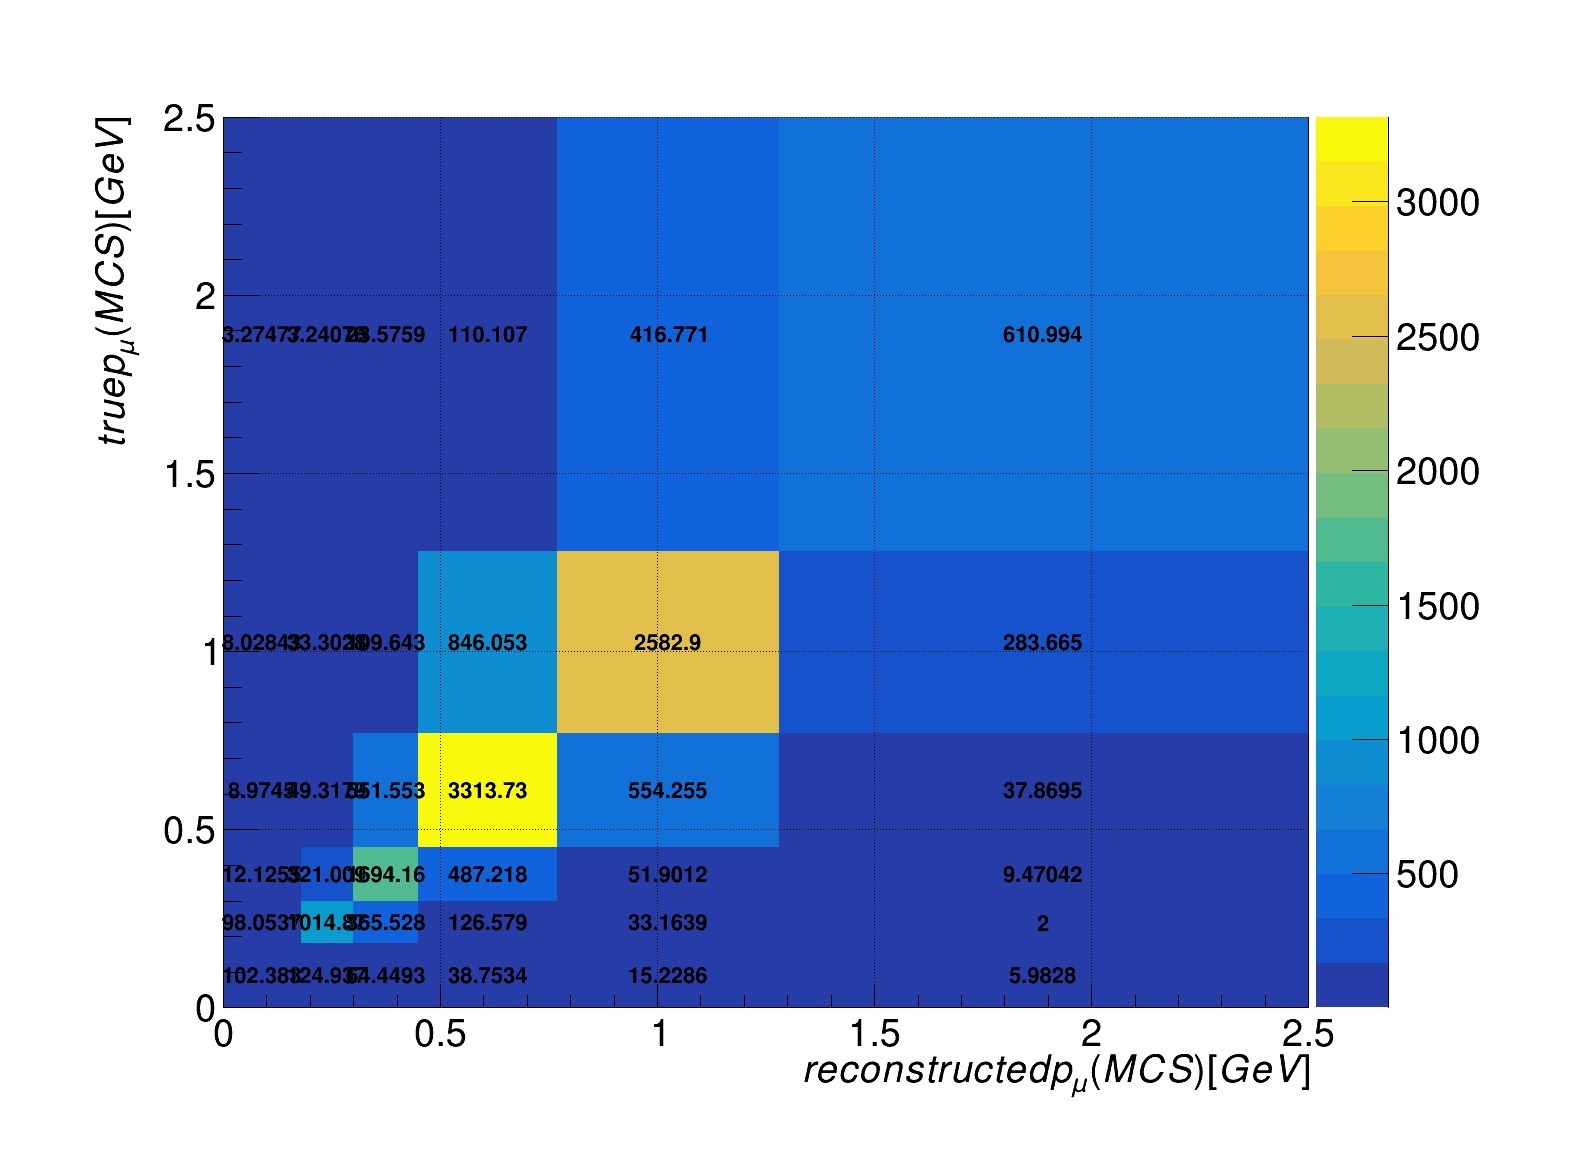

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(outputdir_png + "h2_true_MCS_bin.png")
h_migration.Write("h2_true_MCS_bin")

[[0.29108014 0.0597817  0.00470283 0.00198255 0.00207625 0.00276799]
 [0.35520271 0.61875014 0.12450219 0.01089478 0.00861251 0.00273926]
 [0.18323345 0.22285646 0.6570732  0.12184328 0.02835515 0.01992745]
 [0.1101784  0.07717285 0.1889659  0.73203336 0.21879965 0.09306756]
 [0.04329581 0.02021948 0.02012972 0.12244002 0.66797058 0.35227451]
 [0.01700949 0.00121937 0.00367307 0.00836572 0.07335924 0.51644086]
 [0.         0.         0.00095309 0.00244028 0.00082662 0.01278237]]


650

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_mitigation_matrix.root has been created


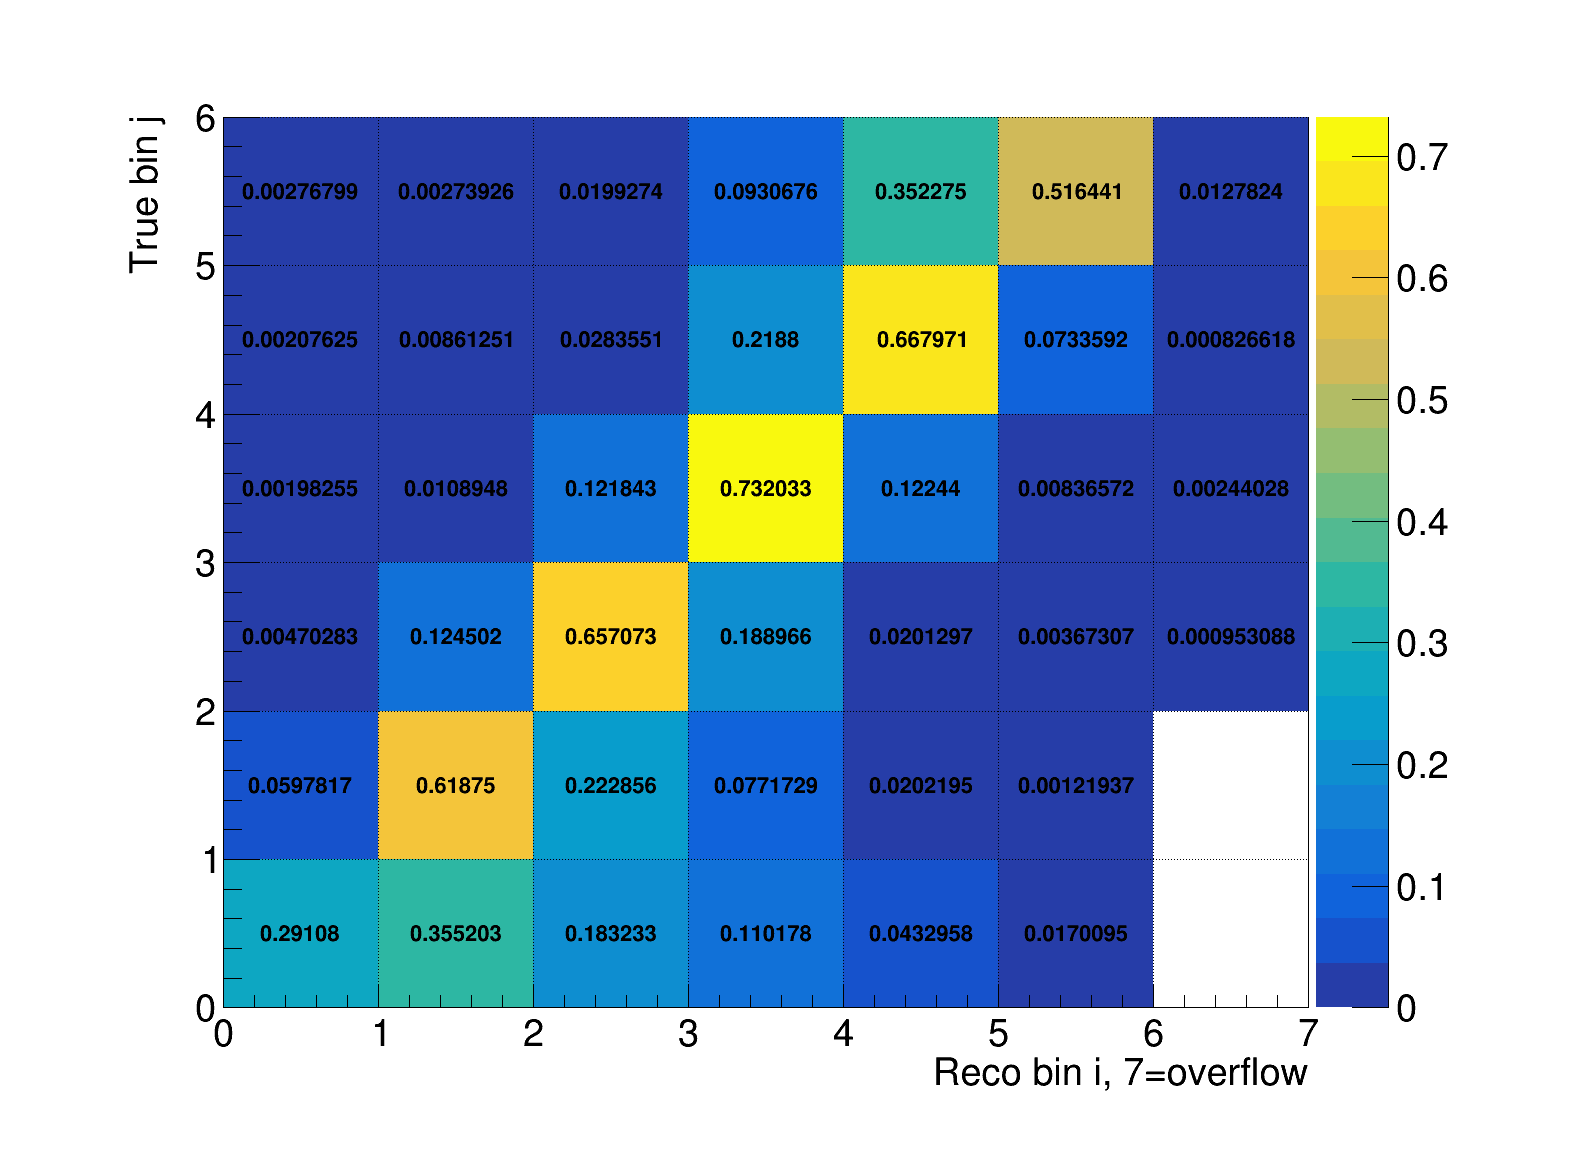

In [23]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))

for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
        
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_matrix.root")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [24]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

488

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [25]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
Err_sel = np.zeros((6))
Err_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((6))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec',eff_tilde)


169.48927307128906 2314.780517578125 0.07322045083074219
1357.666259765625 3539.981689453125 0.38352352607093976
2356.5966796875 5021.732421875 0.46927961940425345
4368.86474609375 7893.810546875 0.5534544717219361
3784.35107421875 5982.60107421875 0.6325594883013217
1161.249267578125 1763.925537109375 0.6583323633270354
[0.17124973 0.33782532 0.44809098 0.53878892 0.60680749 0.62724463
 0.59910724]
[0.11898198 0.30868108 0.48352377 0.6230564  0.71557713 0.72514086
 0.78471181]


In [26]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.010100702164521365
0.009717394006333582
0.007874752329825176
0.006163950910621404
0.006787688496145531
0.012187237680130119
[0.00361812 0.01073986 0.01037702 0.01048246 0.01037426 0.00705607
 0.00018394]


465

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_eff_tilde_xsecMom.root has been created


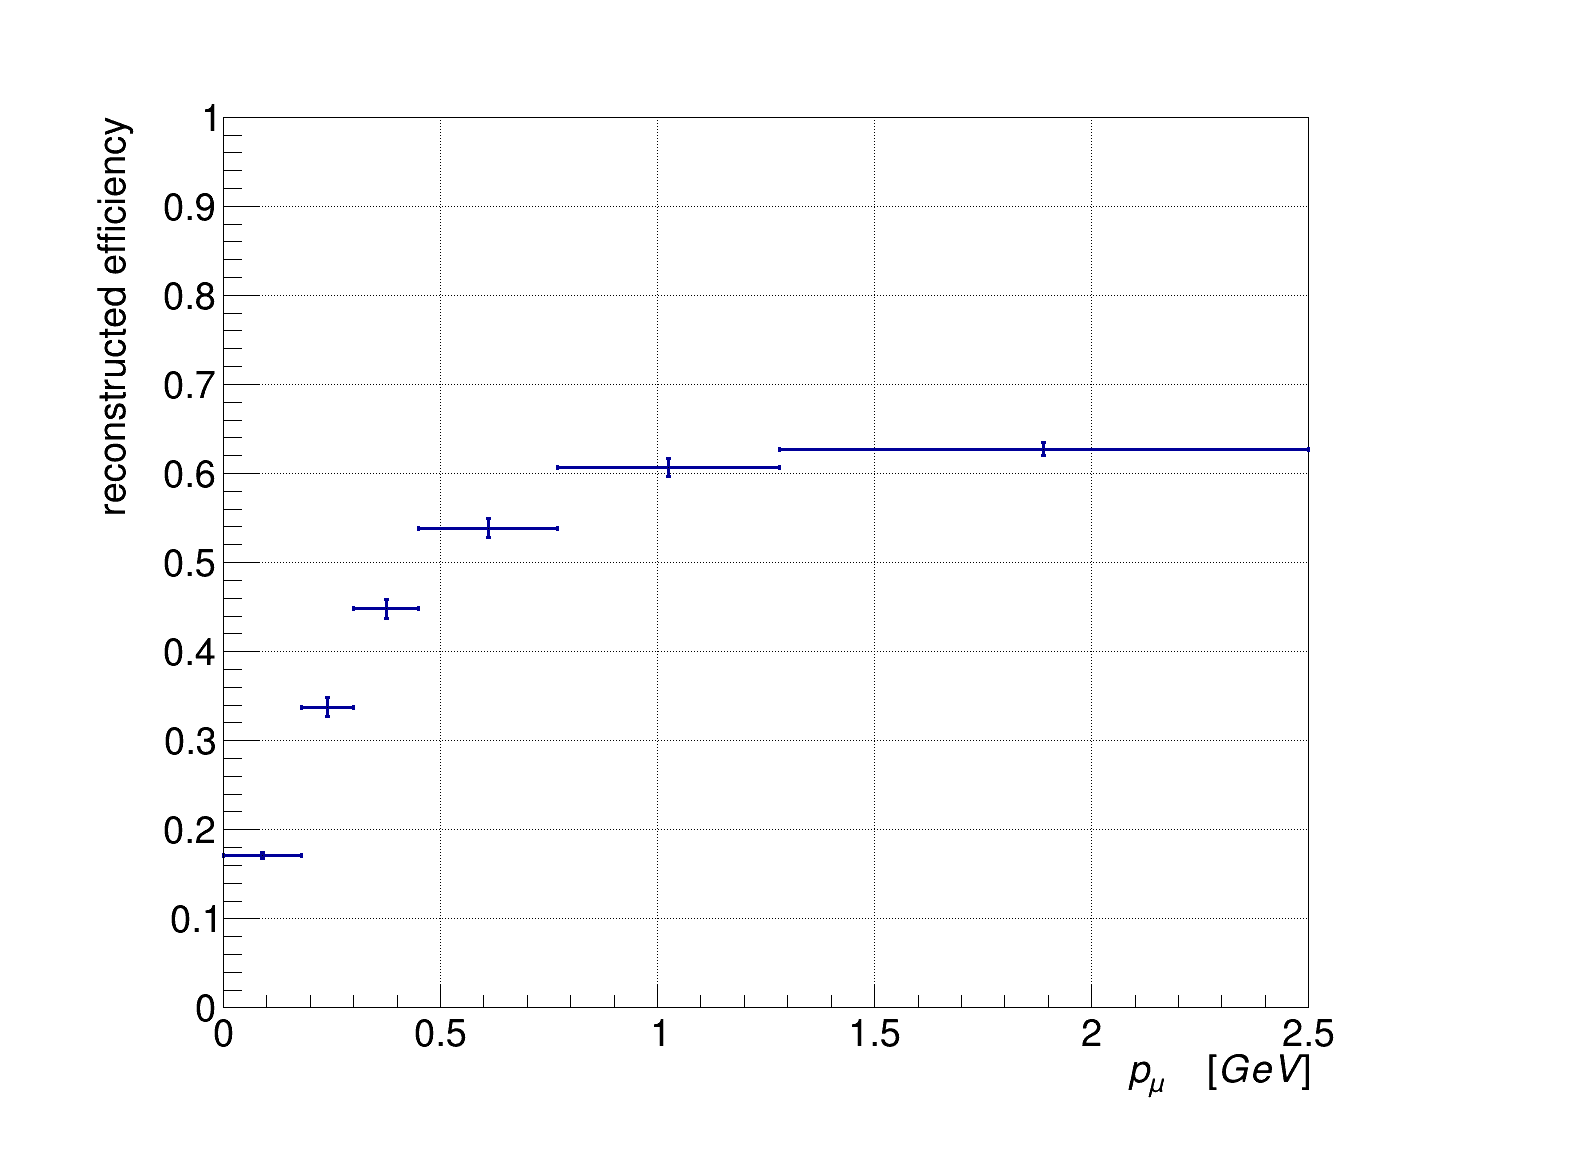

In [27]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.SetXTitle("p_{\mu} \quad [GeV]")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecMom.root")

h_eff_tilde.Write("h_eff_tilde")

In [28]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2565L

In [29]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

438

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [30]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

220.978360176
1048.11068153


In [31]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [32]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [33]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

422

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_xsec_corr.root has been created


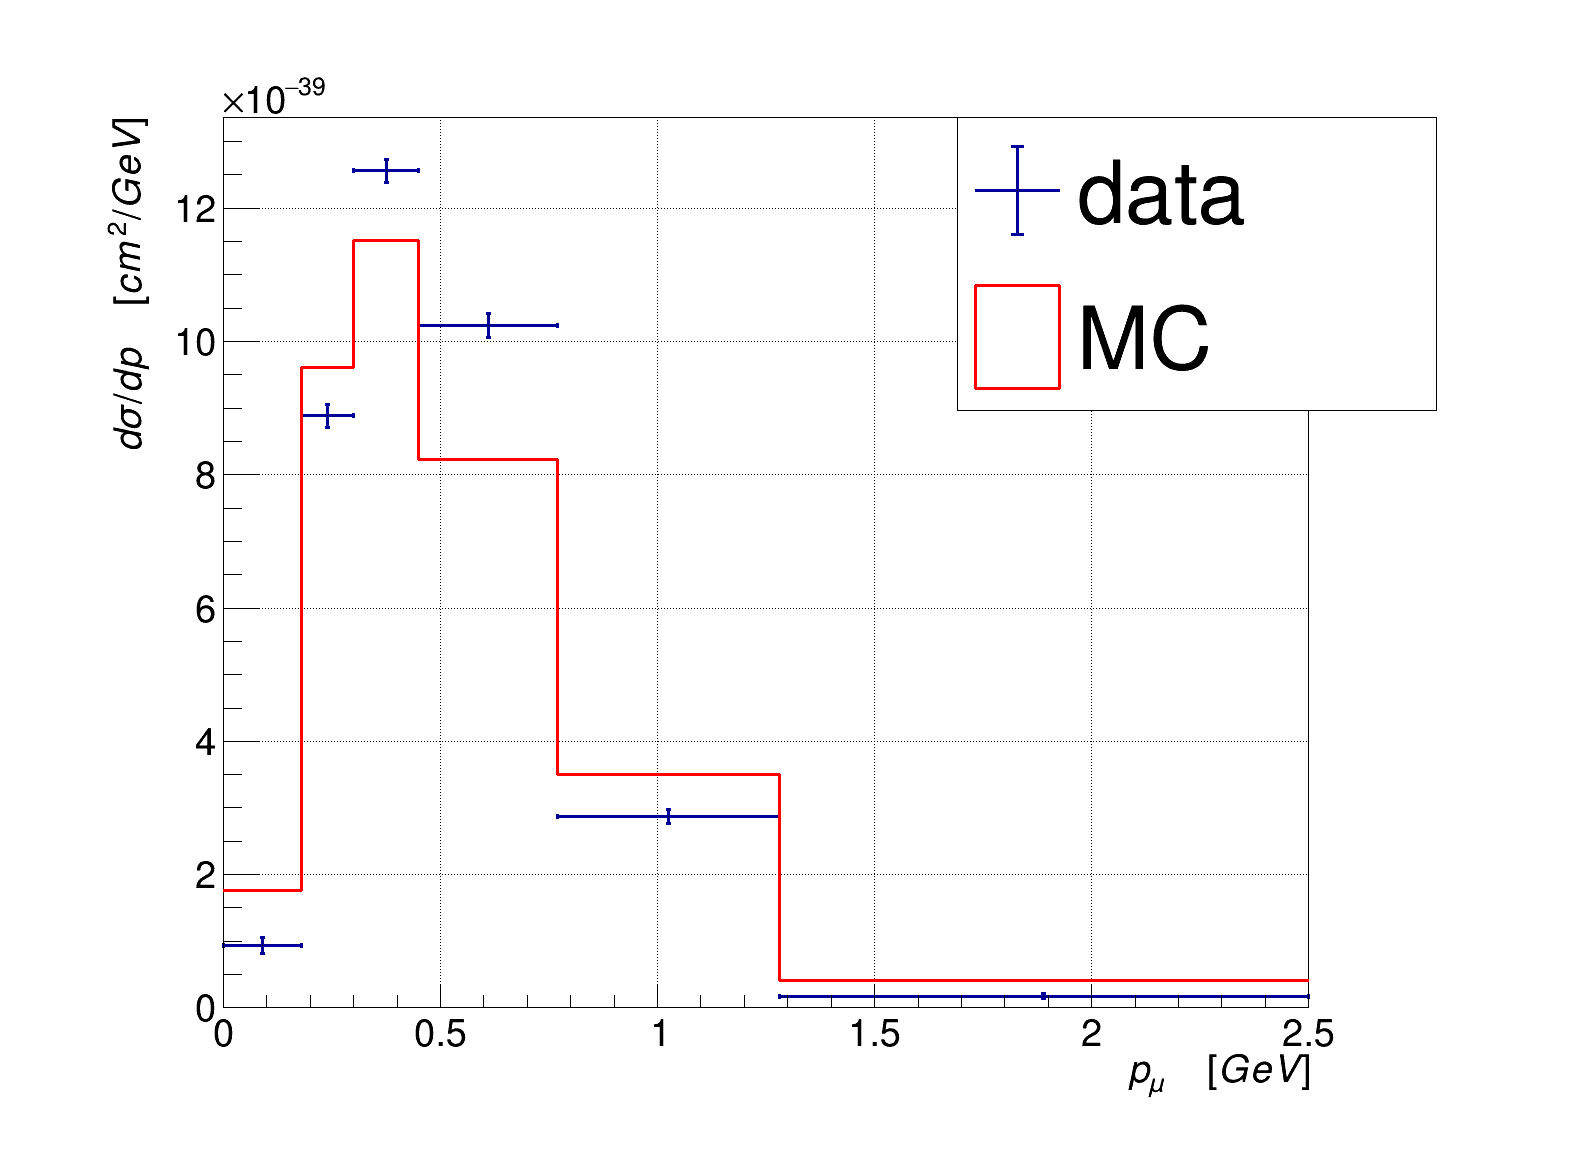

In [34]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr.png")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Now in bins of Theta

In [35]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

854

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_eff_trueTheta.root has been created


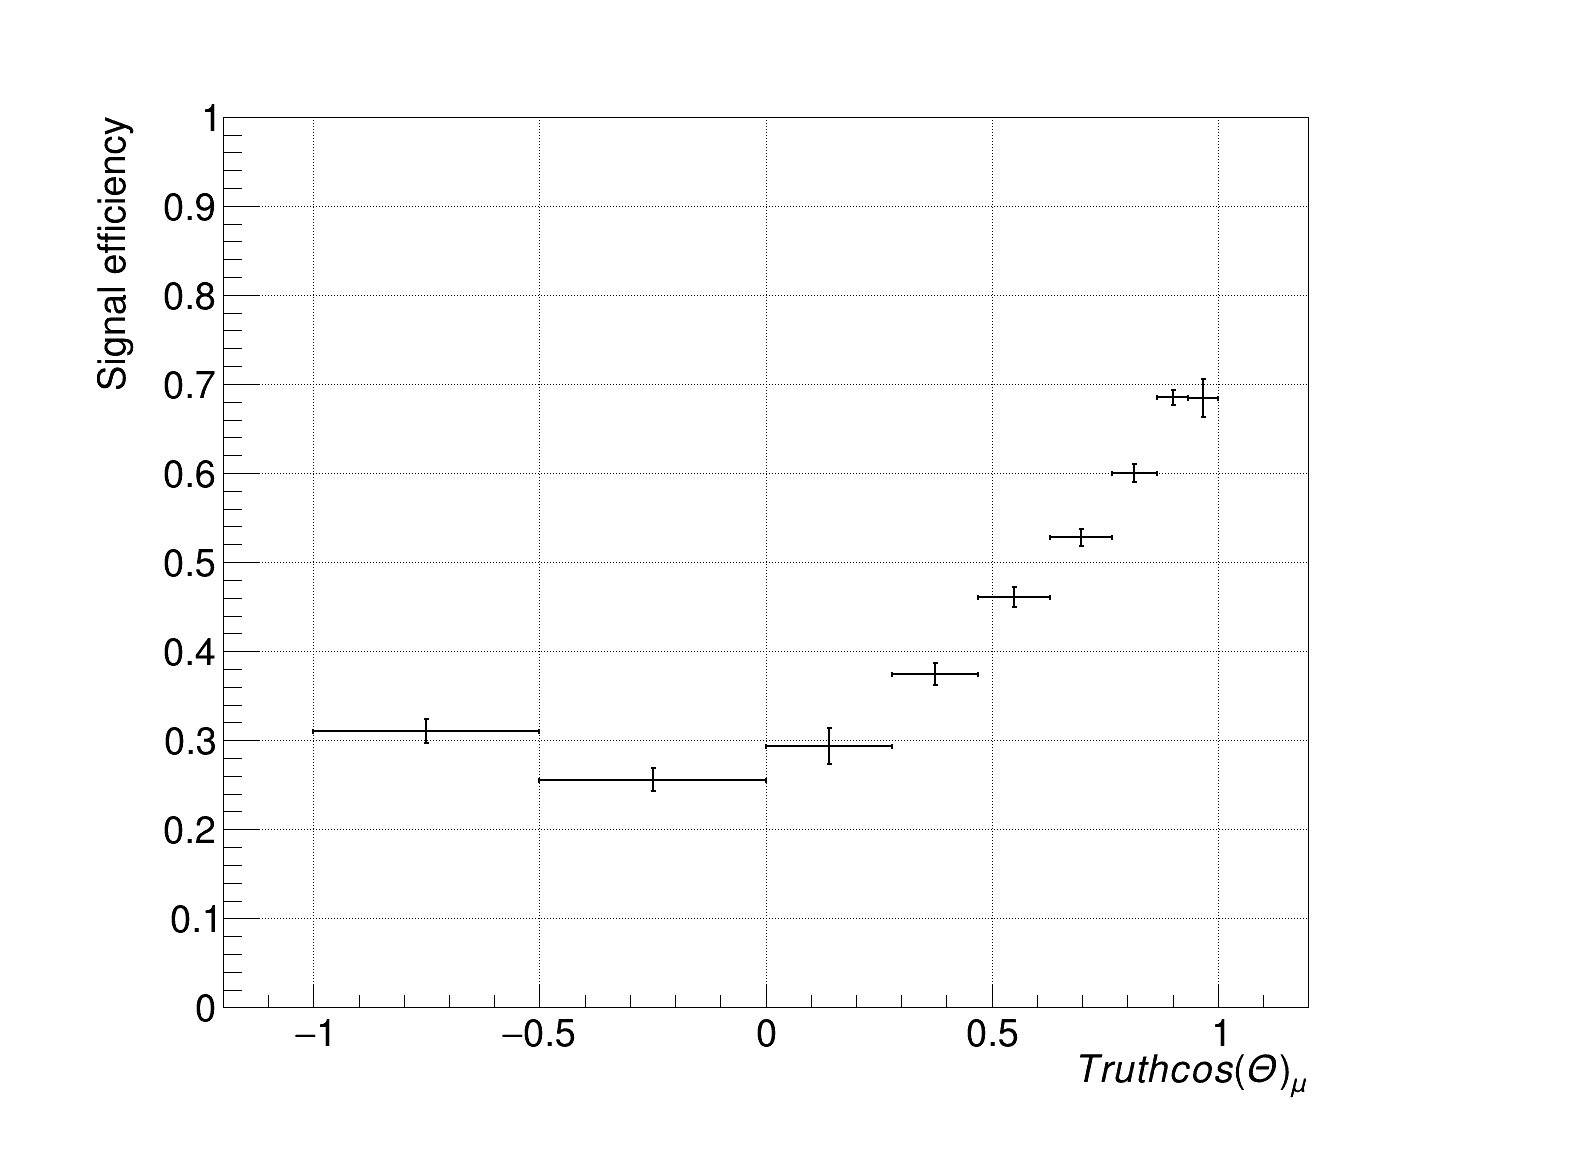

In [36]:
# calculate true theta
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth cos(\Theta)_{\mu}")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(outputdir_root + "h_eff_trueTheta.root")

eff.Write("h_eff_true_theta")

40221

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h2_true_Theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h2_true_Theta.png has been created


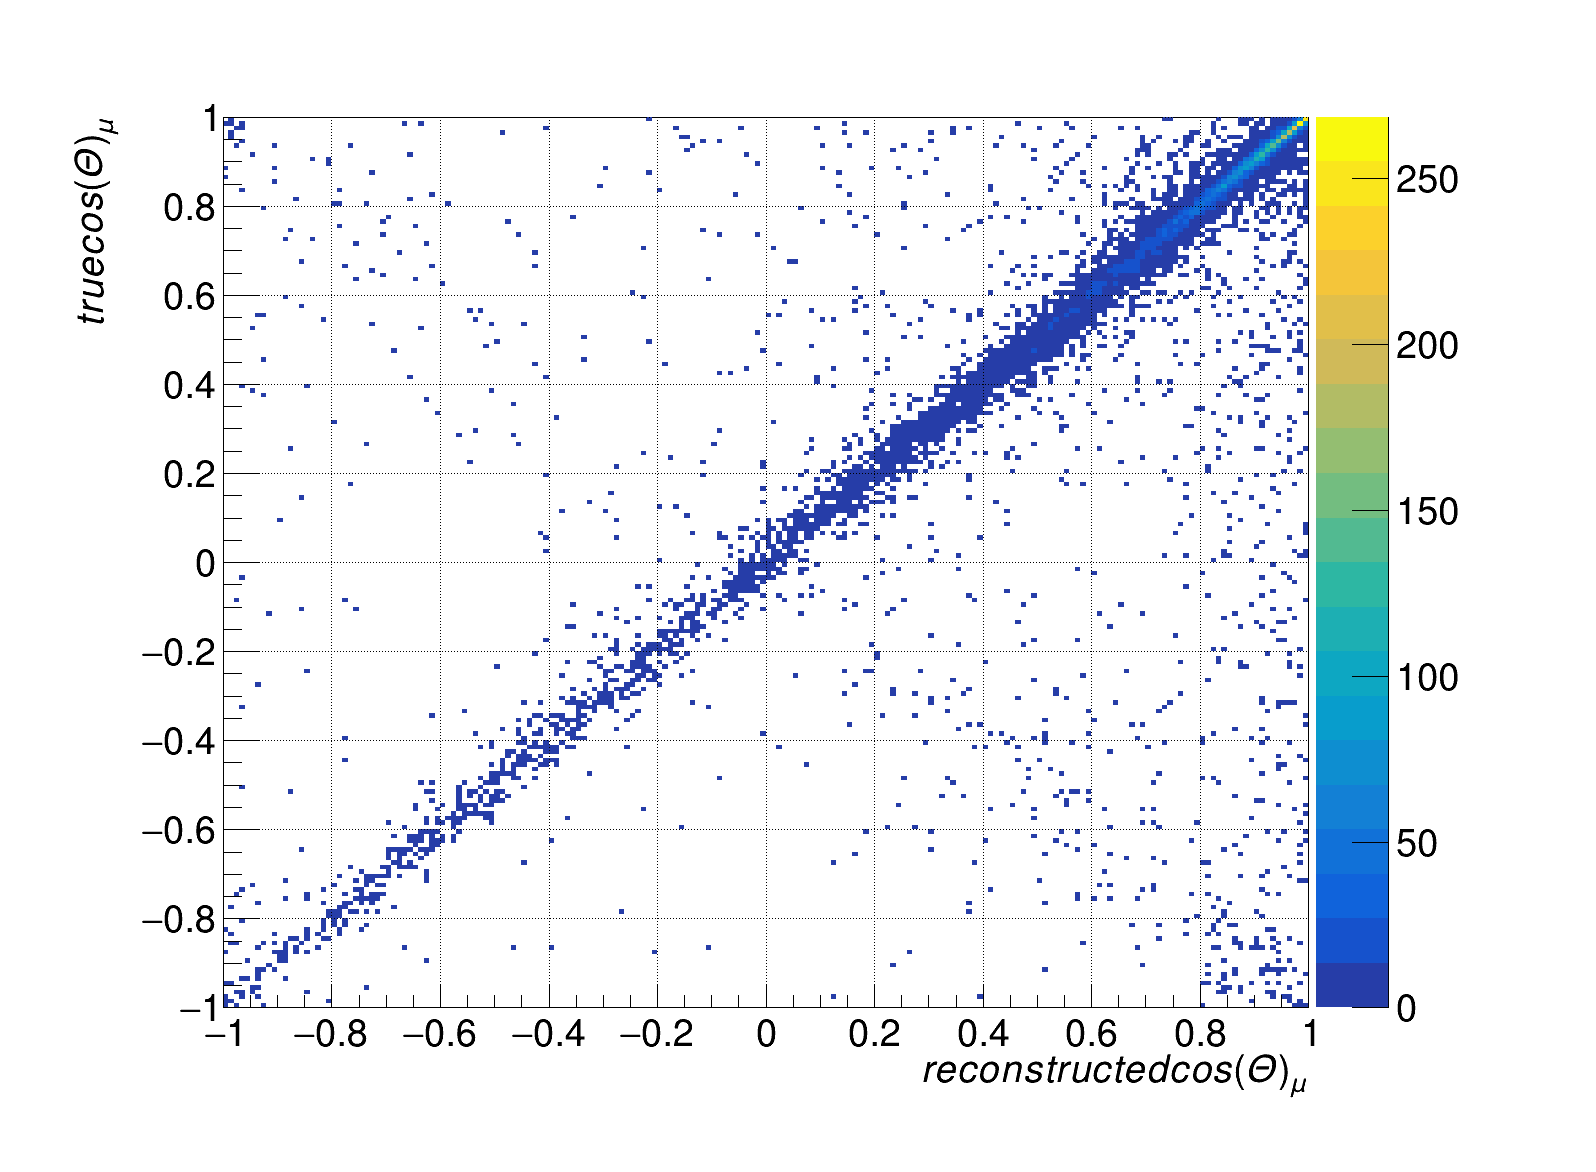

In [37]:
# plot fine binned reco true
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reconstructed cos(\Theta)_{\mu}")
h_migration.SetYTitle("true cos(\Theta)_{\mu}")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta.root")
c1.SaveAs(outputdir_png + "h2_true_Theta.png")
h_migration.Write("h2_true_theta_fine")

1591

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h2_true_Theta_bin.png has been created


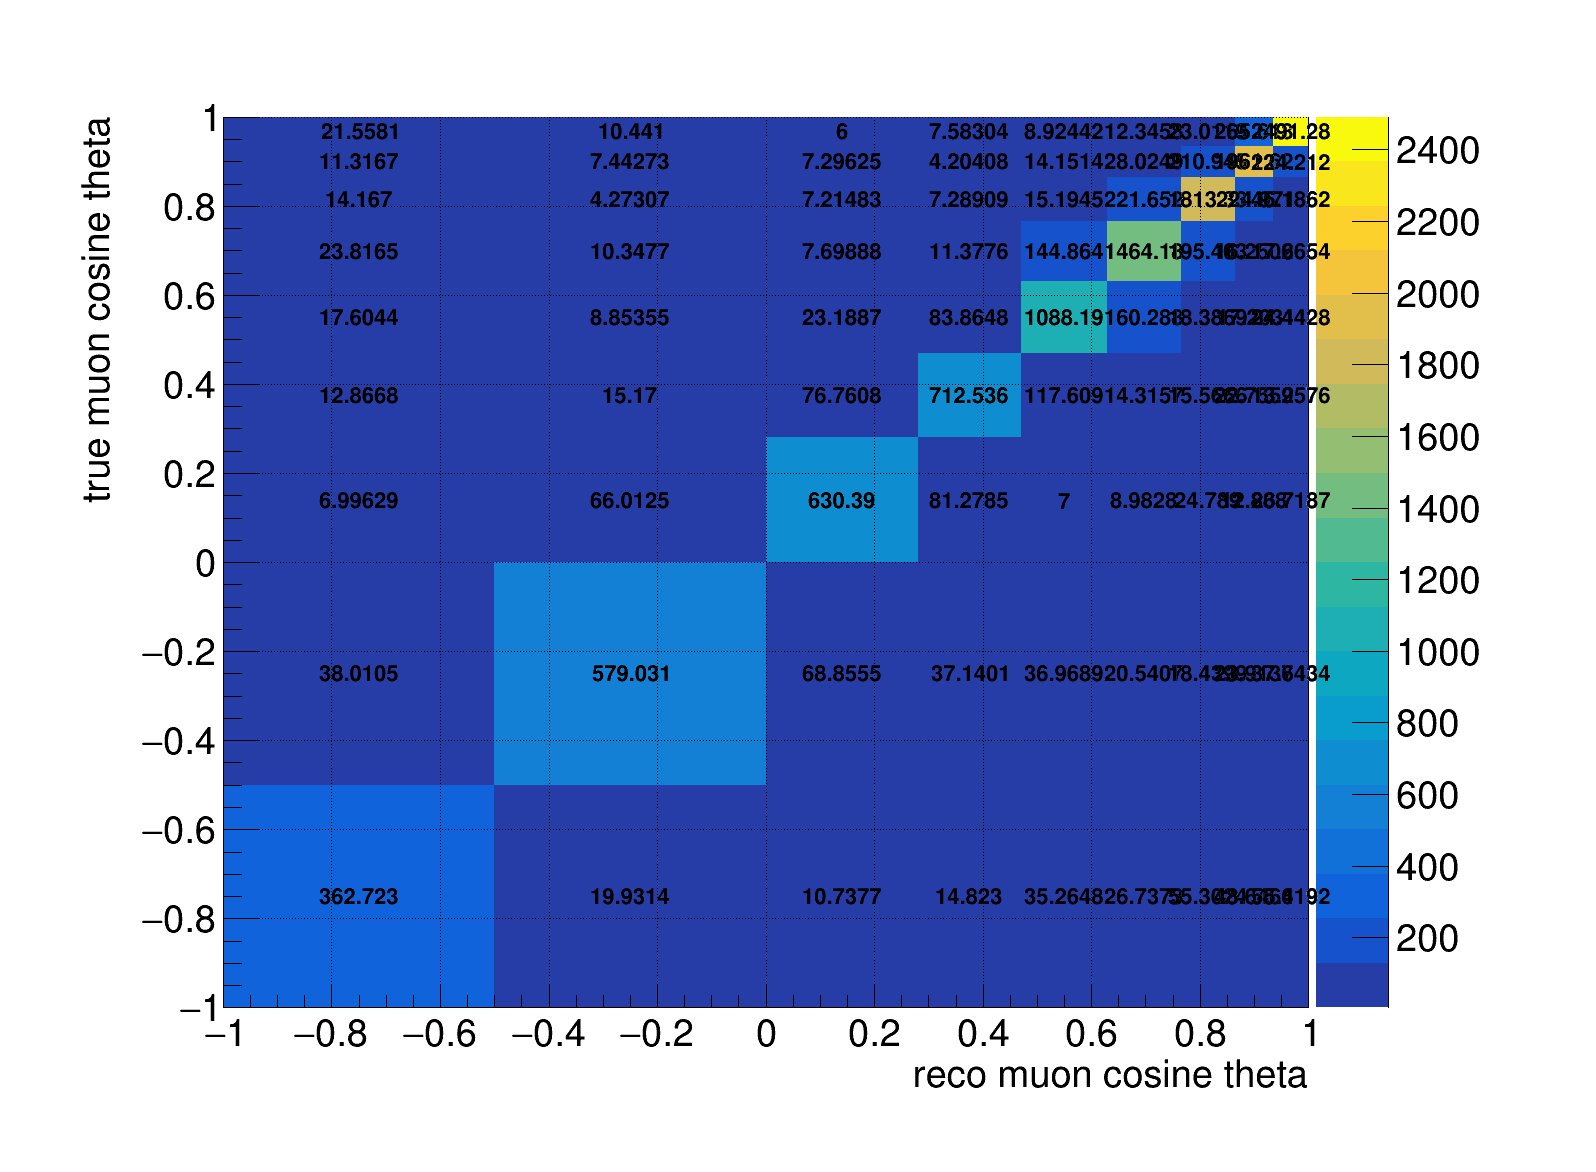

In [38]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reco muon cosine theta")
h_migration.SetYTitle("true muon cosine theta")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(outputdir_png + "h2_true_Theta_bin.png")
h_migration.Write("h2_true_Theta_bin")

[[0.57613    0.04417036 0.00808768 0.01285598 0.01220813 0.01259065
  0.00601757 0.0045831  0.00757286]
 [0.03165795 0.67286644 0.0763101  0.01515726 0.00613968 0.00547034
  0.00181502 0.00301421 0.00366767]
 [0.01705515 0.08001396 0.72872746 0.07669642 0.01608073 0.00407003
  0.00306456 0.00295489 0.00210766]
 [0.02354404 0.04315883 0.09395753 0.71193907 0.05815782 0.00601477
  0.0030961  0.0017026  0.00266375]
 [0.05601274 0.04295996 0.00809197 0.11751064 0.75462731 0.07658245
  0.00645401 0.00573116 0.00313495]
 [0.04246806 0.02386948 0.01038408 0.01430366 0.11115526 0.77404188
  0.09414835 0.01134975 0.00433681]
 [0.08783943 0.02142817 0.02865596 0.0155536  0.01275079 0.10330034
  0.77022823 0.0854303  0.00808355]
 [0.07726765 0.02778907 0.0148985  0.02273685 0.01192986 0.00859071
  0.09555818 0.79443082 0.09330395]
 [0.08802497 0.04374373 0.03088674 0.01324651 0.01695042 0.00933883
  0.01961797 0.09080316 0.87512882]]


847

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_mitigation_theta_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_mitigation_theta_matrix.root has been created


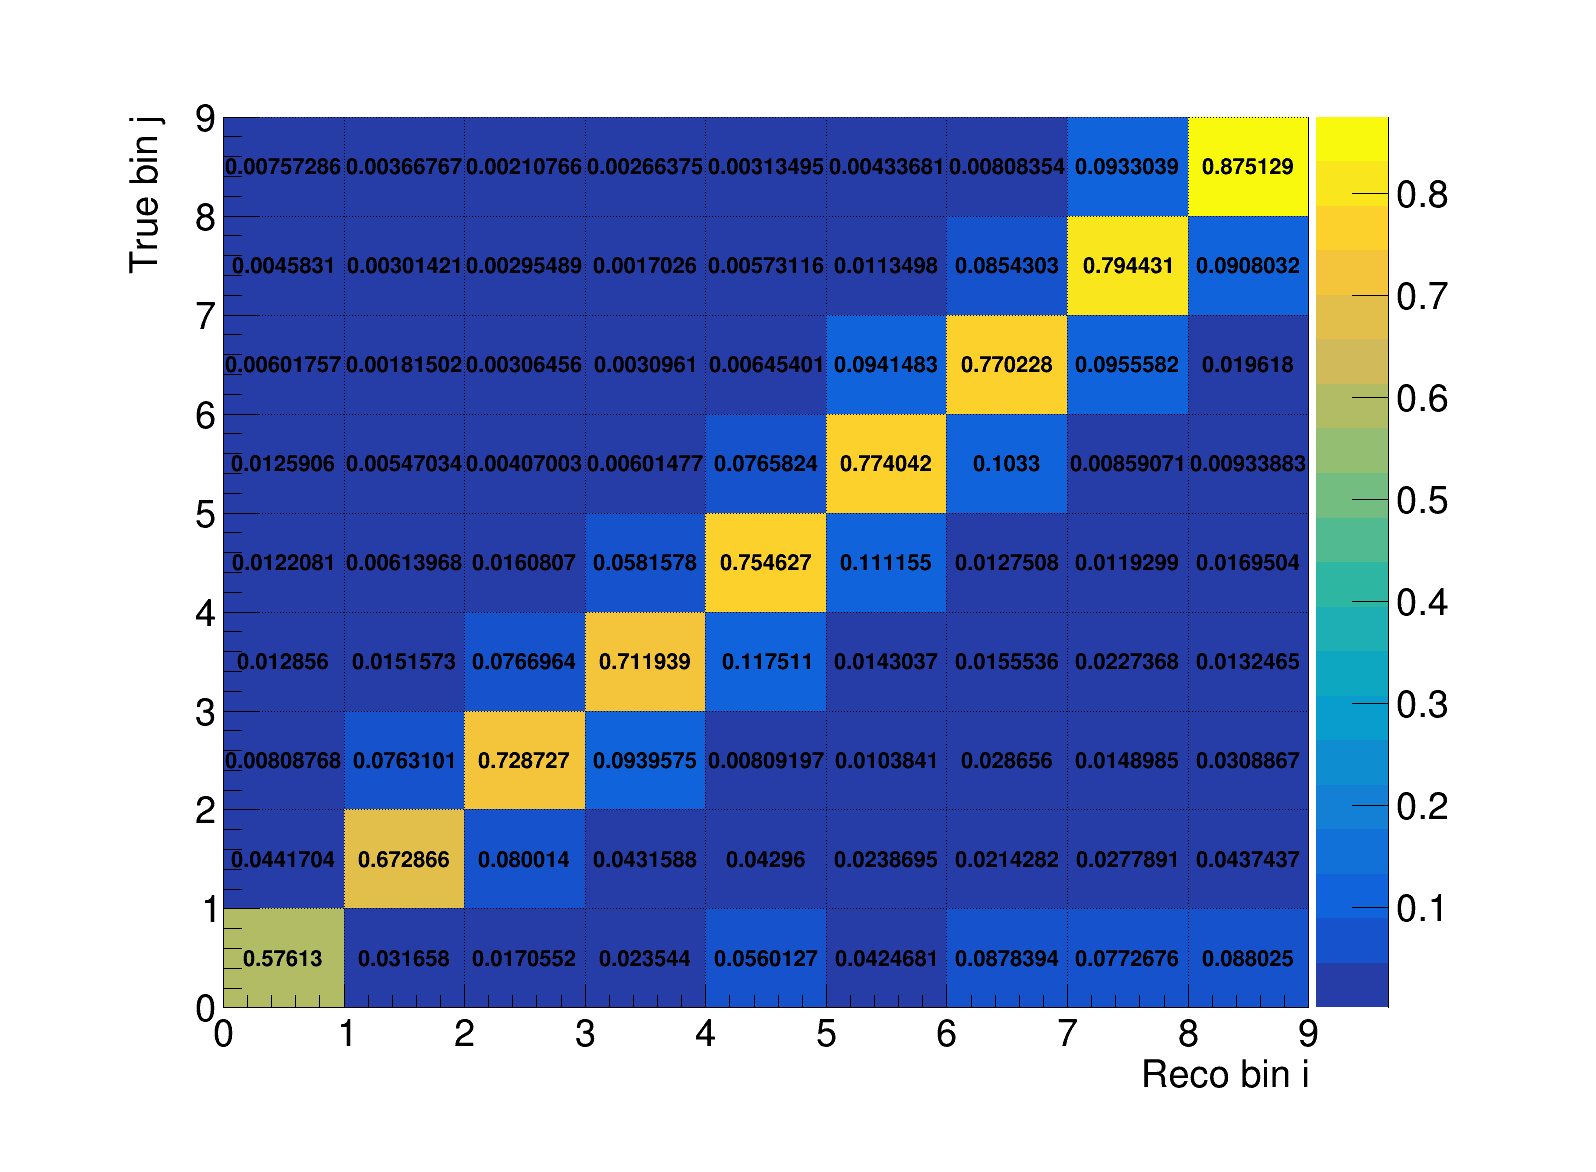

In [39]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_theta_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_theta_matrix.root")

h_mitigation_matrix.Write("h_mitigation_theta_matrix")

In [40]:
# Nselected and N generated
title = 'cosine theta efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

529

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [41]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
Err_sel = np.zeros((9))
Err_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((9))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((9))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_theta_xsec',eff_tilde)


477.6080017089844 1538.643310546875 0.3104085257675671
692.4171142578125 2706.279541015625 0.25585572508816257
737.9321899414062 2516.876953125 0.29319359018531926
899.2802734375 2402.88671875 0.3742499662677866
1327.7669677734375 2881.2177734375 0.46083533845111474
1802.9444580078125 3417.099609375 0.5276242030116229
2276.307373046875 3791.291259765625 0.600404246754599
2406.37109375 3513.35546875 0.6849210434736202
2782.83203125 4067.859130859375 0.6841023599217162
[0.33853371 0.27253861 0.30565952 0.37002975 0.44869377 0.51935387
 0.5769647  0.64585111 0.64693933]
[0.48377337 0.27713994 0.2134848  0.44795689 0.61353112 0.67980961
 0.65722647 0.69179139 0.42909618]


In [42]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.013589875986273224
0.012950504302759139
0.02041879940911134
0.011942696160010728
0.010843027686157044
0.009639122473868908
0.010162703522433286
0.008803015824501359
0.021647697343472883
[0.00923941 0.01112704 0.01738008 0.01209256 0.01199072 0.01108605
 0.01213072 0.01218218 0.02276867]


516

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_eff_tilde_xsecTheta.root has been created


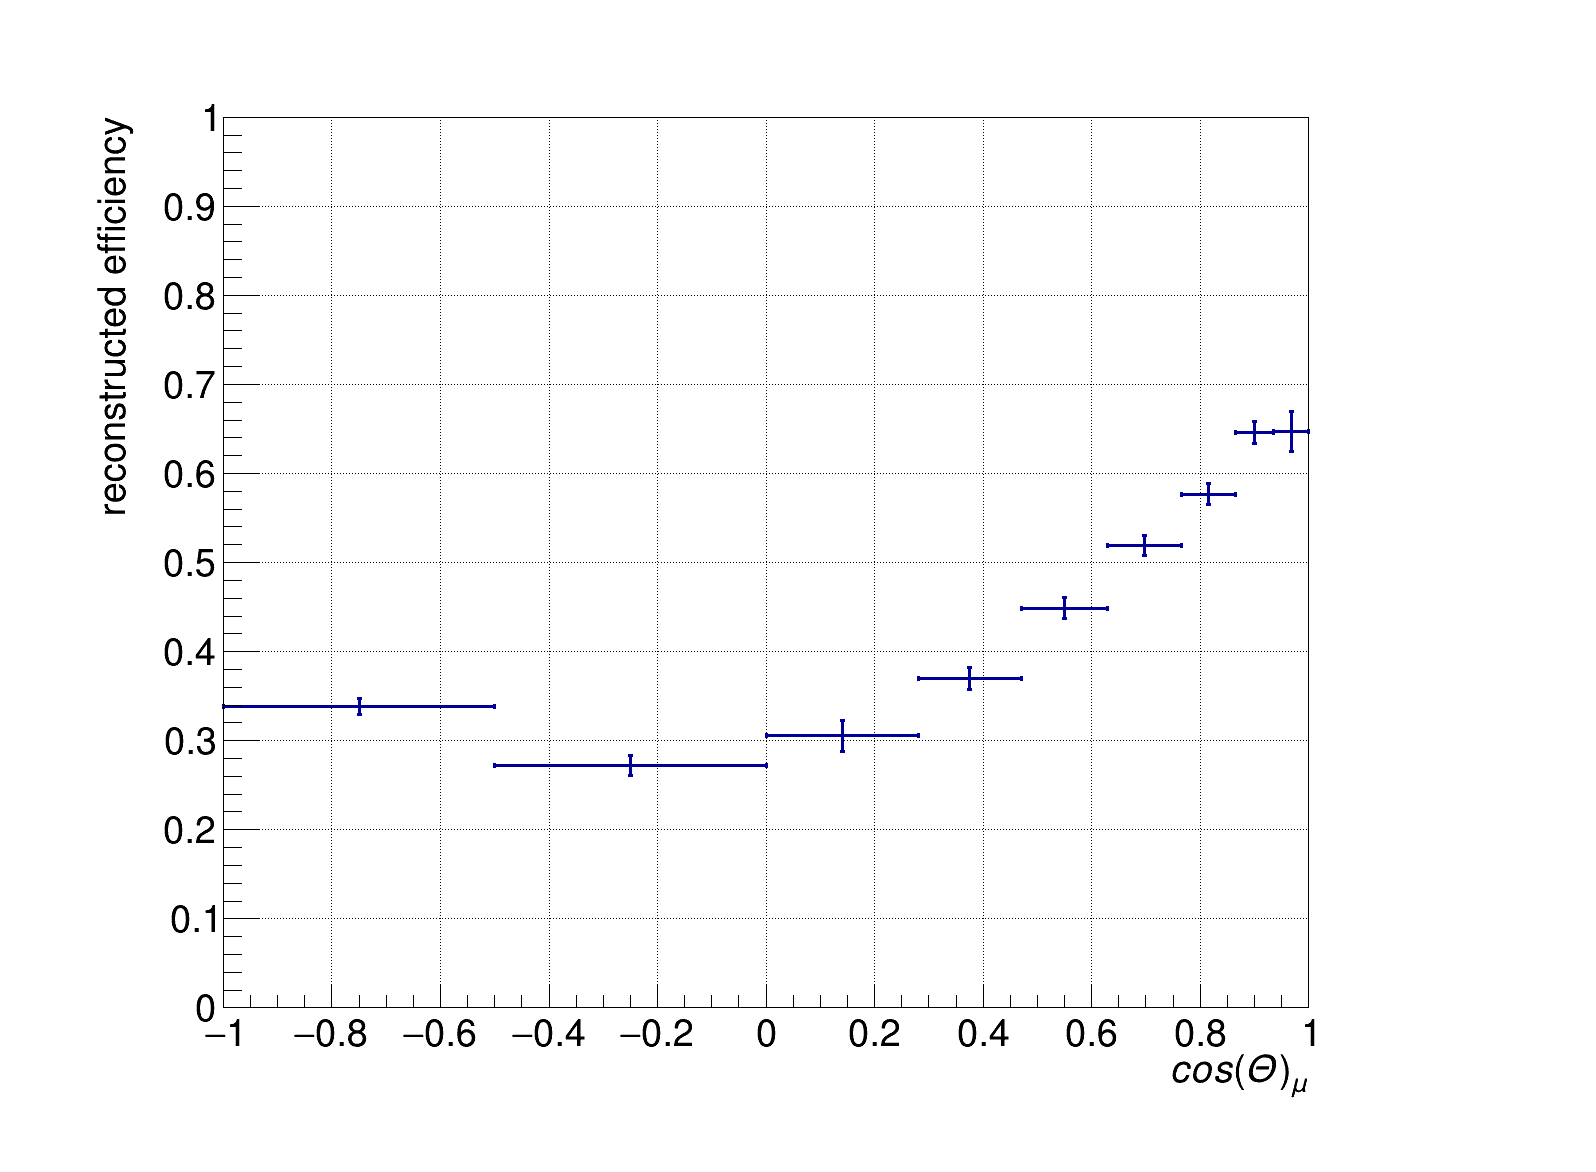

In [43]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.SetXTitle("cos(\Theta)_{\mu}")
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.root")

h_eff_tilde.Write("h_eff_theta_tilde")

In [44]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2565L

Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ext (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dirt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_overlay (Potential memory leak).


In [45]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data_theta")
h_ext.Write("h_ext_theta")
h_dirt.Write("h_dirt_theta")
h_overlay.Write("h_overlay_theta")

478

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [46]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

221.662982941
1050.92459869


In [47]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [48]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

Warning in <TFile::Append>: Replacing existing TH1: h_overlay_sig (Potential memory leak).


In [49]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

479

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV//root/h_xsec_corr_theta.root has been created


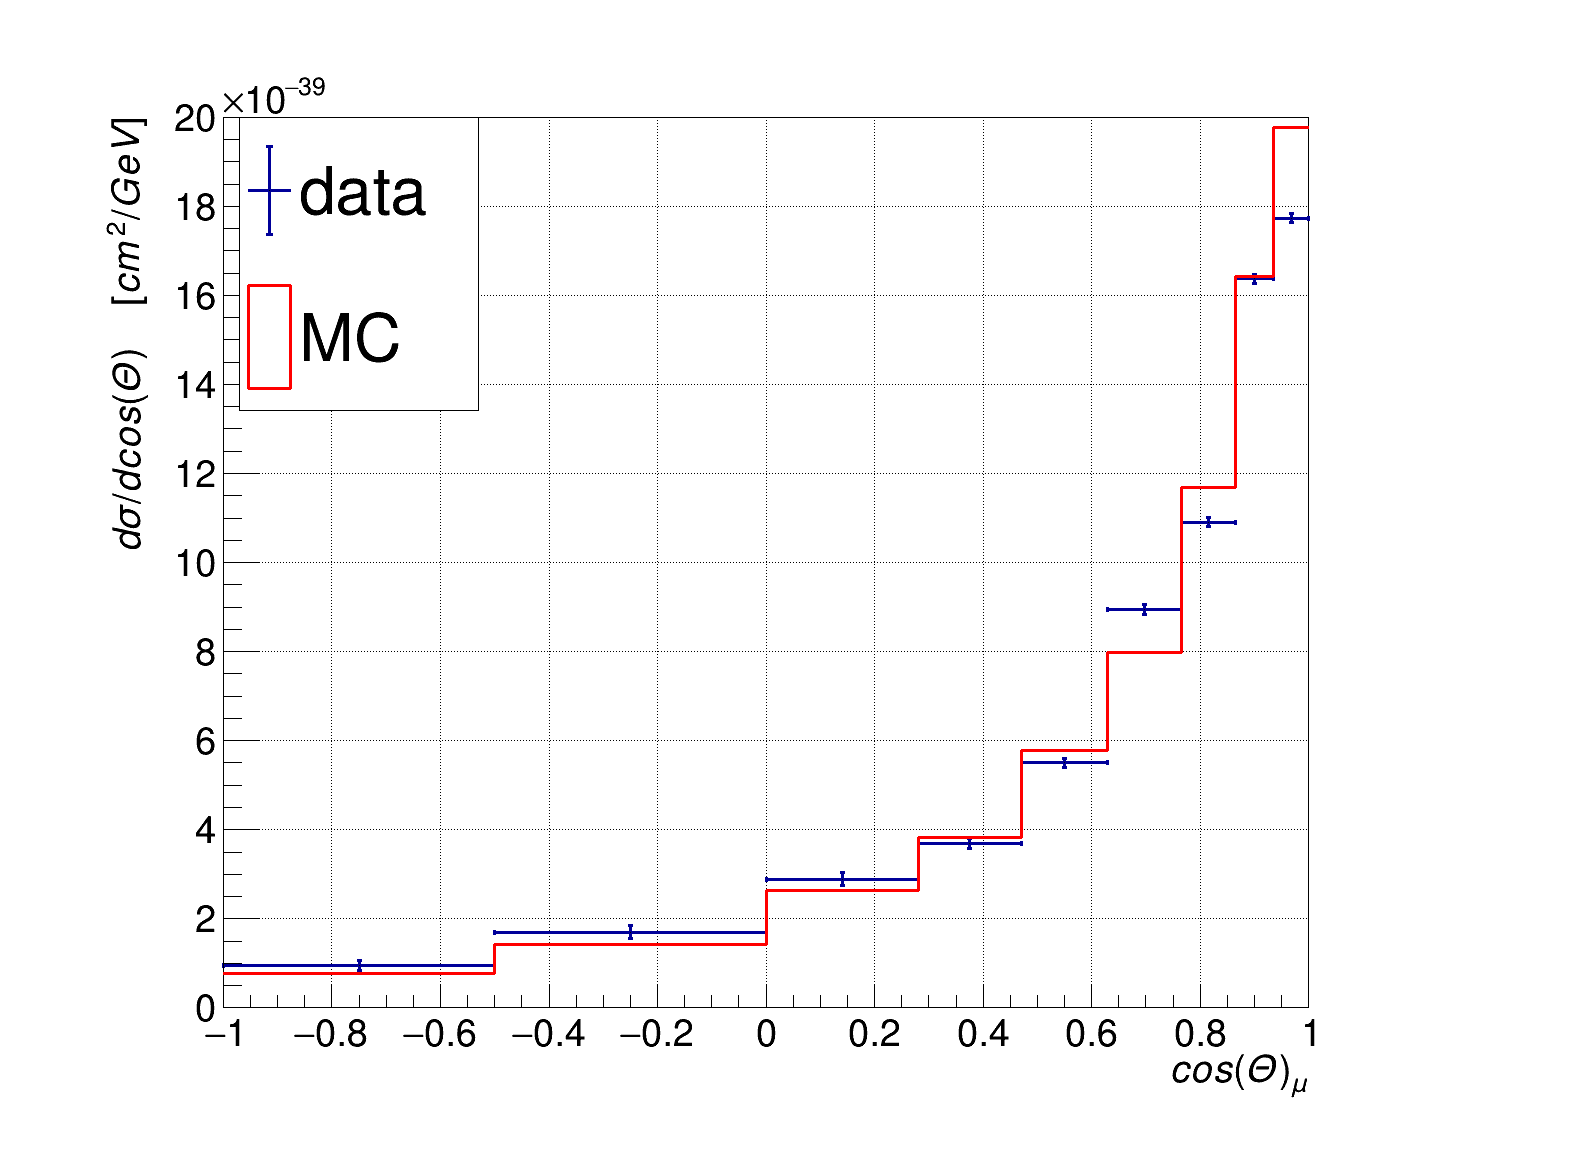

In [50]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9) # rigth
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # left
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetXTitle("cos(\Theta)_{\mu}")
h_data.SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(20e-39)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [51]:
RootFile.Close()